In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Load dataset
df = pd.read_csv("Market_Basket_Optimisation.csv", header=None)

# Display first few rows
print(df.head())

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

In [ ]:
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(df.shape[1]) if str(df.values[i, j]) != 'nan'])

# Print first 5 transactions
print(transactions[:10])

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries']]


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Transform transactions to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display first few rows
print(df_encoded.head())

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
       support                           itemsets
0    0.020397                          (almonds)
1    0.033329                          (avocado)
2    0.033729                         (brownies)
3    0.087188                          (burgers)
4    0.030129                           (butter)
..        ...                                ...
98   0.020131  (whole wheat rice, mineral water)
99   0.022930             (spaghetti, olive oil)
100  0.025197              (spaghetti, pancakes)
101  0.021197                (spaghetti, shrimp)
102  0.020931              (spaghetti, tomatoes)

[103 rows x 2 columns]

Association Rules:
             antecedents      consequents   support  confidence      lift
0             (burgers)           (eggs)  0.028796    0.330275  1.837830
1                (cake)  (mineral water)  0.027463    0.338816  1.421397
2             (chicken)  (mineral water)  0.022797    0.380000  1.594172
3           (chocolate)  (mineral water)  0.052660    

<ipython-input-25-6b2df8b76b6e>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=rules['lift'], y=rules['antecedents'].apply(lambda x: ', '.join(list(x))), ci=None)


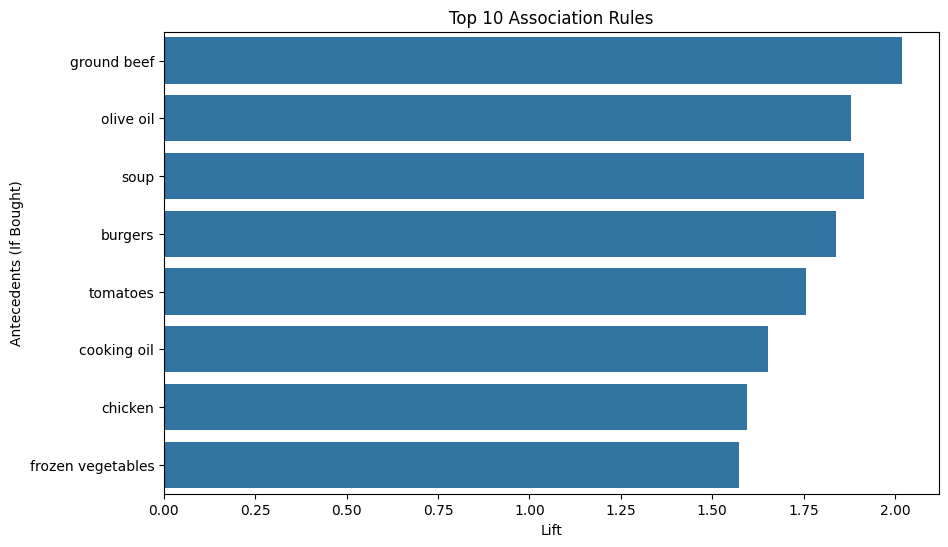

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort rules by lift
rules = rules.sort_values(by="lift", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=rules['lift'], y=rules['antecedents'].apply(lambda x: ', '.join(list(x))), ci=None)
plt.xlabel("Lift")
plt.ylabel("Antecedents (If Bought)")
plt.title("Top 10 Association Rules")
plt.show()

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
18,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
14,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
11,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400


In [ ]:
# Display association rules with consequents
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
8,(ground beef),(spaghetti),0.039195,0.398915,2.291162
18,(olive oil),(spaghetti),0.022930,0.348178,1.999758
14,(soup),(mineral water),0.023064,0.456464,1.914955
0,(burgers),(eggs),0.028796,0.330275,1.837830
11,(olive oil),(mineral water),0.027596,0.419028,1.757904
19,(tomatoes),(spaghetti),0.020931,0.306043,1.757755
7,(ground beef),(mineral water),0.040928,0.416554,1.747522
4,(cooking oil),(mineral water),0.020131,0.394256,1.653978
2,(chicken),(mineral water),0.022797,0.380000,1.594172
6,(frozen vegetables),(mineral water),0.035729,0.374825,1.572463


Retail Stores → Adjust store layouts to position frequently associated products near each other.

E-Commerce Sites → Suggest “Frequently Bought Together” items to customers.

Marketing & Promotions → Offer combo discounts on highly associated items.

#### Experimenting with difference support values

In [ ]:
# lowered support threshold (e.g., 1% instead of 2%)
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [ ]:
# Change confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,1.0,0.005365,1.543848,0.540342,0.040816,0.352268,0.274586
1,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,1.0,0.005822,1.532552,0.537969,0.044385,0.347493,0.274725


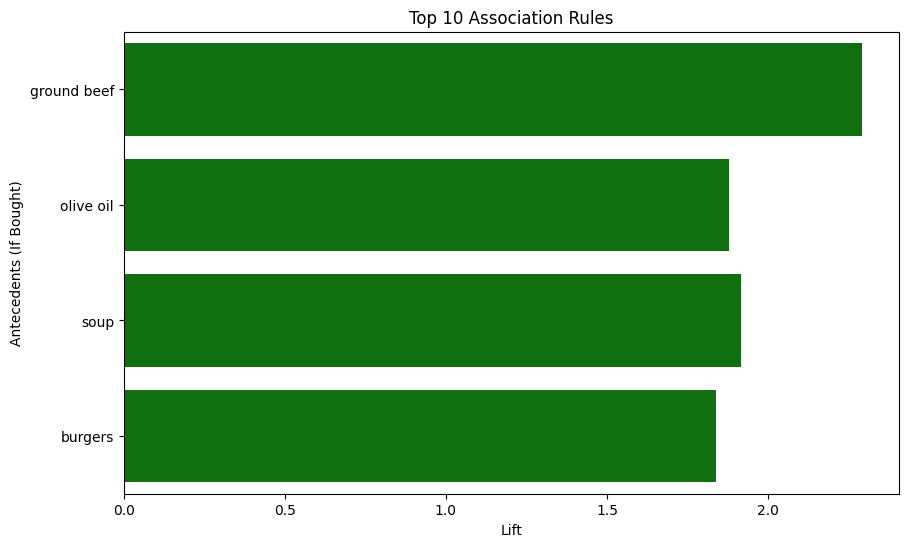

In [ ]:
# Sort rules by lift
rules = rules.sort_values(by="lift", ascending=False).head()

plt.figure(figsize=(10,6))
sns.barplot(x=rules['lift'], y=rules['antecedents'].apply(lambda x: ', '.join(list(x))), errorbar=None, color='green')
plt.xlabel("Lift")
plt.ylabel("Antecedents (If Bought)")
plt.title("Top 10 Association Rules")
plt.show()

#### using a self-created dataset:

In [ ]:
# Example dataset
dataset = [
    ['milk', 'bread'],
    ['milk', 'diapers', 'beer', 'bread'],
    ['milk', 'diapers', 'beer', 'cola'],
    ['diapers', 'beer'],
    ['milk', 'diapers', 'beer', 'bread'],
    ['diapers', 'bread'],
    ['milk', 'bread', 'beer'],
    ['milk', 'diapers', 'bread']
]

In [ ]:
# Convert dataset to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
# Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.625,(beer)
1,0.750,(bread)
2,0.750,(diapers)
3,0.750,(milk)
4,0.500,"(beer, diapers)"
5,0.500,"(beer, milk)"
6,0.500,"(diapers, bread)"
7,0.625,"(milk, bread)"
8,0.500,"(milk, diapers)"


In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0      (beer)   (diapers)               0.625                0.75    0.500   
1      (beer)      (milk)               0.625                0.75    0.500   
2      (milk)     (bread)               0.750                0.75    0.625   
3     (bread)      (milk)               0.750                0.75    0.625   

   confidence      lift  representativity  leverage  conviction  \
0    0.800000  1.066667               1.0   0.03125        1.25   
1    0.800000  1.066667               1.0   0.03125        1.25   
2    0.833333  1.111111               1.0   0.06250        1.50   
3    0.833333  1.111111               1.0   0.06250        1.50   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.166667  0.571429   0.200000    0.733333  
1       0.166667  0.571429   0.200000    0.733333  
2       0.400000  0.714286   0.333333    0.833333  
3       0.400000  0.714286   0.333333    0.833333  


##### Creating our own dataset:

In [8]:
import pandas as pd
import random

# Define a list of possible food items
food_items = [
    "Burger", "Fries", "Coke", "Pizza", "Pasta", "Salad", "Nuggets",
    "Ice Cream", "Coffee", "Tea", "Hot Dog", "Sandwich", "Smoothie",
    "Taco", "Sushi", "Donut", "Milkshake", "Wrap", "Fried Chicken", "Muffin"
]

# Generate 500 transactions with random food item combinations
transactions = []
for _ in range(500):
    num_items = random.randint(2, 6)  # Each transaction has 2 to 6 items
    transaction = random.sample(food_items, num_items)
    transactions.append(transaction)

# Convert list of transactions into a DataFrame where each row is a transaction
df_transactions = pd.DataFrame(transactions)

# Save dataset as CSV file
file_path = "/content/FastFood_Orders.csv"
df_transactions.to_csv(file_path, index=False, header=False)

print("Downloaded at: ",file_path)

Downloaded at:  /content/FastFood_Orders.csv


In [7]:
data = pd.read_csv("FastFood_Orders.csv")
data.head()

,Muffin,Salad,Smoothie,Sushi,Sandwich,Unnamed: 5
0,Sushi,Burger,NaN,NaN,NaN,NaN
1,Coke,Nuggets,Hot Dog,Sushi,Ice Cream,NaN
2,Wrap,Salad,Hot Dog,Smoothie,NaN,NaN
3,Smoothie,Sandwich,Donut,Nuggets,Pasta,NaN
4,Milkshake,Pizza,Muffin,NaN,NaN,NaN
